# CITS5508 Machine Learning  - Assignment 3
# Franco Meng 23370209

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from matplotlib import colormaps
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [3]:
df = pd.read_csv ('housingCalifornia.csv')
print(df)

       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88                41         880            129   
1        -122.22     37.86                21        7099           1106   
2        -122.24     37.85                52        1467            190   
3        -122.25     37.85                52        1274            235   
4        -122.25     37.85                52        1627            280   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48                25        1665            374   
20636    -121.21     39.49                18         697            150   
20637    -121.22     39.43                17        2254            485   
20638    -121.32     39.43                18        1860            409   
20639    -121.24     39.37                16        2785            616   

       population  households  medianIncome oceanProximity  medianHouseValue  
0             322   

In [4]:
# Identifying categorical columns
df.select_dtypes(exclude=["number","bool_"]).columns

Index(['oceanProximity'], dtype='object')

# D1

## (a)

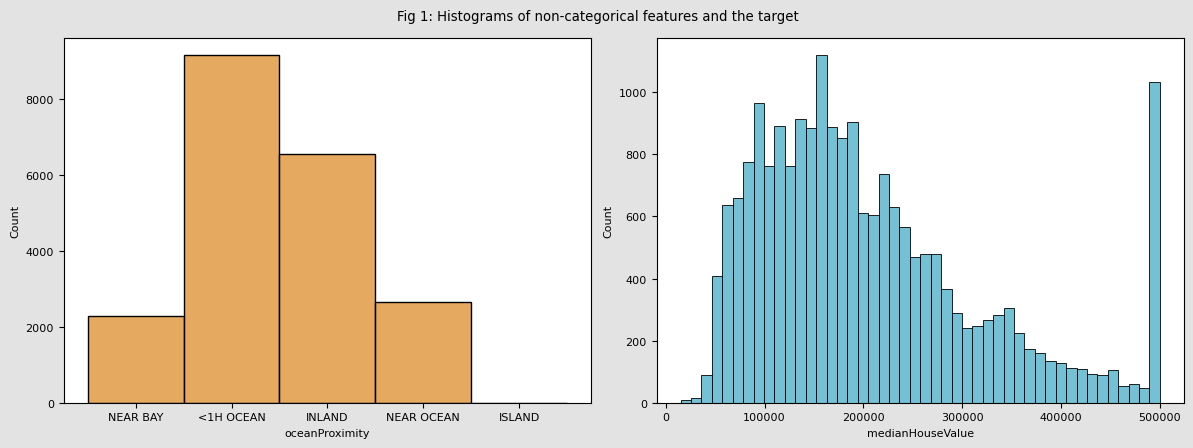

In [5]:
matplotlib.rcParams['font.size'] = 8
fig, axes = plt.subplots( 1, 2, figsize=(12, 4.5))
fig.suptitle('Fig 1: Histograms of non-categorical features and the target')
fig.set_facecolor('#E3E3E3')
sns.histplot(ax = axes[0], data=df, x='oceanProximity', color = '#DD8D29')
sns.histplot(ax = axes[1], data=df, x='medianHouseValue', color = "#46ACC8")
plt.tight_layout()
plt.savefig('Fig 1.png', bbox_inches='tight')

## (b)

In [7]:
df_cor_matrix = df.loc[:, df.columns != 'oceanProximity']

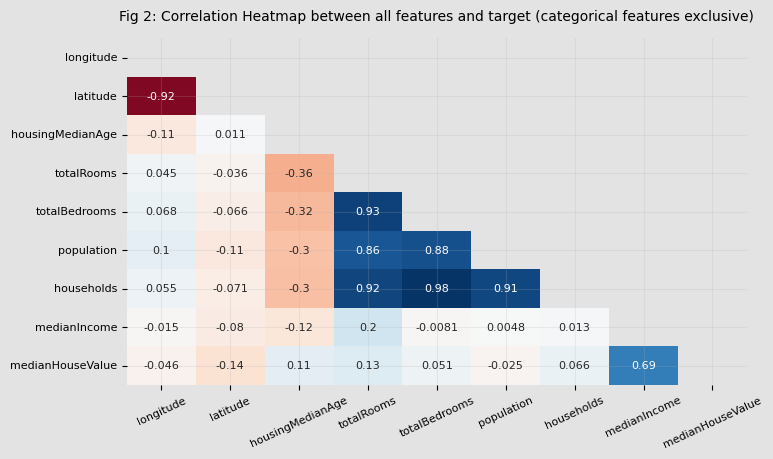

In [8]:
matplotlib.rcParams['font.size'] = 8
fig, ax = plt.subplots(figsize=(8, 4.5))
mask = np.triu(np.ones_like(df_cor_matrix.corr(), dtype=bool))
heatmap = sns.heatmap(df_cor_matrix.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu',cbar=False)
heatmap.set_title('Fig 2: Correlation Heatmap between all features and target (categorical features exclusive)', fontdict={'fontsize':10}, pad=13)
ax.set_facecolor('#E3E3E3')
ax.grid(visible=True, which='major', axis='both', alpha = 0.2)
plt.xticks(rotation=25) 
fig.set_facecolor('#E3E3E3')
plt.savefig('Fig 2.png', bbox_inches='tight')

## (c)

In [9]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

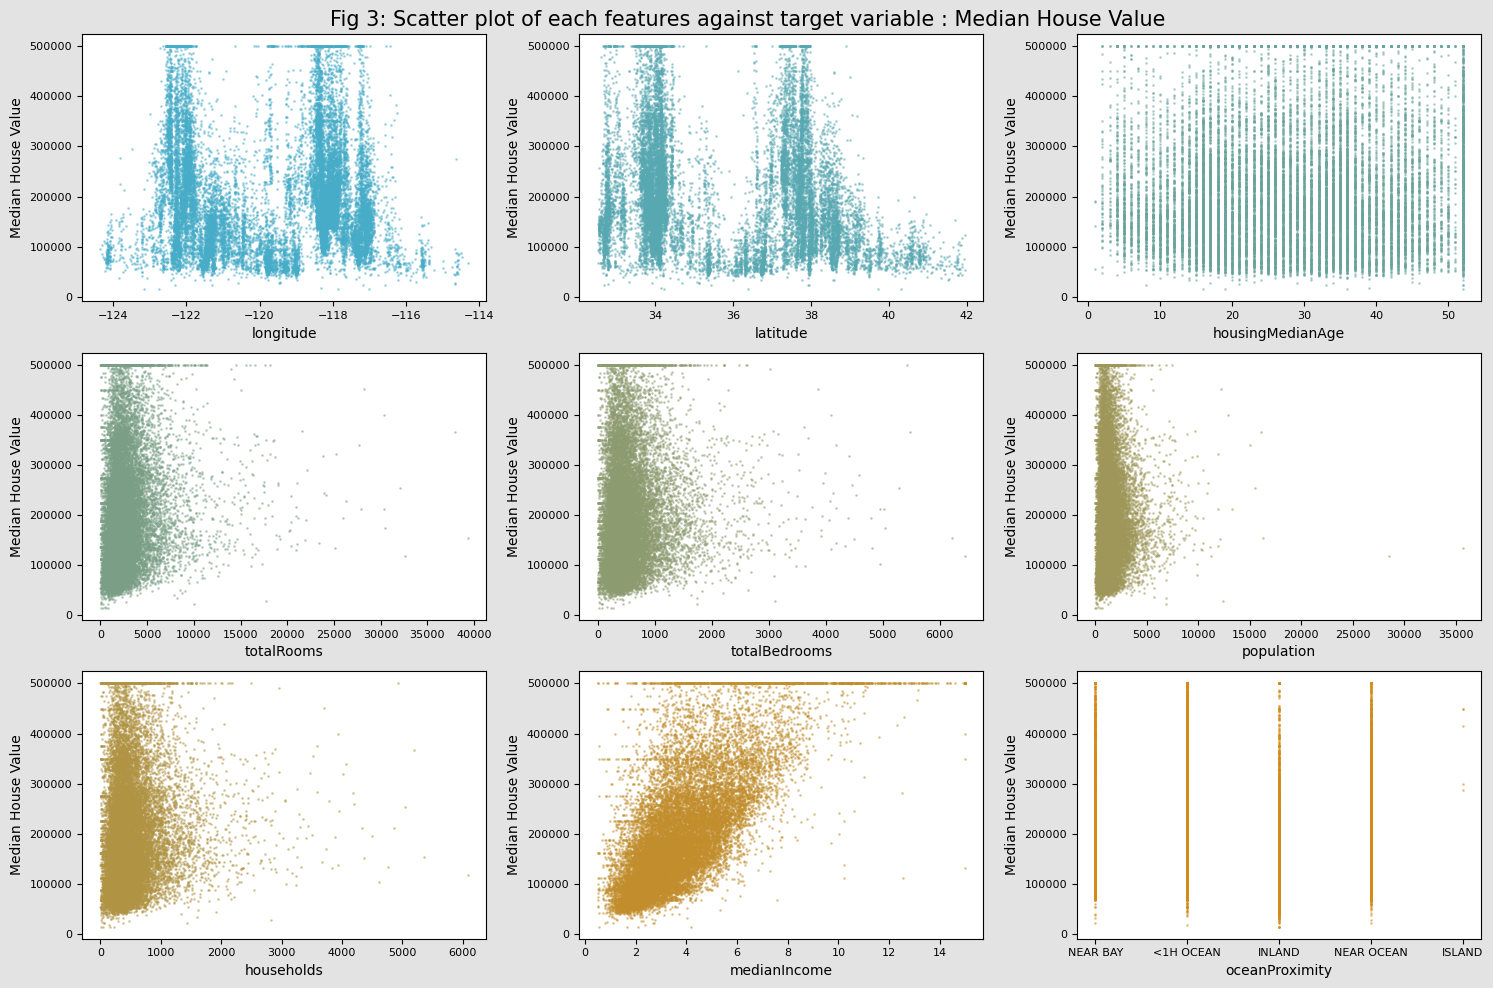

In [11]:
c1='#46ACC8'
c2='#E58601' 
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(df.iloc[:,i], df[['medianHouseValue']], s = 1, alpha = 0.4, c =colorFader(c1,c2,i/len(axs.flatten())) )
    #ax.set_title(f'{df.columns[i]} vs Median House Value')
    ax.set_xlabel (f'{df.columns[i]}', fontsize = 10)
    ax.set_ylabel ('Median House Value',fontsize = 10)
fig.set_facecolor('#E3E3E3')
fig.suptitle('Fig 3: Scatter plot of each features against target variable : Median House Value', fontsize=15)
plt.tight_layout()
plt.savefig('Fig 3.png', bbox_inches='tight')

In [12]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Below prepare Data 1 and Data 2

In [13]:
df['oceanProximity'].value_counts()

oceanProximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
df['oceanProximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: oceanProximity, Length: 20640, dtype: object

In [15]:
df_cat = df[['oceanProximity']]

In [16]:
cat_encoder = OneHotEncoder(drop='first')

In [17]:
house_cat_1hot = cat_encoder.fit_transform(df_cat)

In [18]:
house_cat_1hot.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [22]:
cat_encoder.categories_[0][1:].tolist()

['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [23]:
cat_df = pd.DataFrame(house_cat_1hot.toarray().tolist(), columns=cat_encoder.categories_[0][1:].tolist())

In [25]:
num_df_1 = df.loc[:, df.columns != 'oceanProximity']

In [26]:
data1 = pd.concat([num_df_1, cat_df], axis=1)

In [28]:
#data2 = new_df.loc[:, new_df.columns != 'oceanProximity']

In [29]:
num_df_2 = df.loc[:, df.columns != 'oceanProximity']
num_df_2['medianHouseValue'] = num_df_2['medianHouseValue']/100000

C:\Users\coffe\AppData\Local\Temp\ipykernel_4680\3221050402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df_2['medianHouseValue'] = num_df_2['medianHouseValue']/100000


In [30]:
data2 = pd.concat([num_df_2, cat_df], axis=1)

### Below build linear and Lasso reg for Data 1 and Data 2

In [33]:
data1_y = data1['medianHouseValue'].copy()

In [34]:
data1_x = data1.drop('medianHouseValue', axis = 1)

In [35]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    data1_x, data1_y, test_size=0.2, random_state=5508
)

In [36]:
data2_y = data2['medianHouseValue'].copy()

In [37]:
data2_x = data2.drop('medianHouseValue', axis = 1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    data2_x, data2_y, test_size=0.2, random_state=5508
)

In [39]:
lin_reg_1 = linear_model.LinearRegression()
lin_reg_1.fit(X_train_1,y_train_1)

LinearRegression()

In [40]:
lasso_reg_1 = linear_model.Lasso(alpha=100)
lasso_reg_1.fit(X_train_1,y_train_1)

Lasso(alpha=100)

In [60]:
print("RMSE for linear model - data 1 training (orginal): %.2f" % mean_squared_error(y_train_1,lin_reg_1.predict(X_train_1),squared=False))
print("RMSE for linear model - data 1 test (orginal): %.2f" % mean_squared_error(y_test_1,lin_reg_1.predict(X_test_1),squared=False))
print("RMSE for lasso model - data 1 training (orginal): %.2f" % mean_squared_error(y_train_1,lasso_reg_1.predict(X_train_1),squared=False))
print("RMSE for lasso model - data 1 test (orginal): %.2f" % mean_squared_error(y_test_1,lasso_reg_1.predict(X_test_1),squared=False))

RMSE for linear model - data 1 training (orginal): 68607.31
RMSE for linear model - data 1 test (orginal): 68589.31
RMSE for lasso model - data 1 training (orginal): 68660.50
RMSE for lasso model - data 1 test (orginal): 68601.81


In [42]:
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_train_2,y_train_2)

LinearRegression()

In [43]:
lasso_reg_2 = linear_model.Lasso(alpha=100)
lasso_reg_2.fit(X_train_2,y_train_2)

Lasso(alpha=100)

In [59]:
print("RMSE for linear model - data 2 training (orginal): %.2f" % mean_squared_error(y_train_2,lin_reg_2.predict(X_train_2),squared=False))
print("RMSE for linear model - data 2 test (orginal): %.2f" % mean_squared_error(y_test_2,lin_reg_2.predict(X_test_2),squared=False))
print("RMSE for lasso model - data 2 training (orginal): %.2f" % mean_squared_error(y_train_2,lasso_reg_2.predict(X_train_2),squared=False))
print("RMSE for lasso model - data 2 test (orginal): %.2f" % mean_squared_error(y_test_2,lasso_reg_2.predict(X_test_2),squared=False))

RMSE for linear model - data 2 training (orginal): 0.69
RMSE for linear model - data 2 test (orginal): 0.69
RMSE for lasso model - data 2 training (orginal): 1.13
RMSE for lasso model - data 2 test (orginal): 1.12


In [817]:
# sc_1 = StandardScaler()
# X_train_1_sd = sc_1.fit_transform(X_train_1)
# X_test_1_sd = sc_1.transform (X_test_1)

### Designing a function to standardise only numeric columns, fit on training data then transform both training and testing. 

In [45]:
def my_sdard_ (training, testing, position):
    a, b = training.iloc[:,:position], training.iloc[:,position:]
    c, d = testing.iloc[:,:position], testing.iloc[:,position:]
    ss = StandardScaler()
    a_sd = ss.fit_transform(a)
    a_sd_df = pd.DataFrame(a_sd, columns = a.columns.tolist())
    c_sd = ss.transform (c)
    c_sd_df = pd.DataFrame(c_sd, columns = c.columns.tolist())
    return pd.concat([a_sd_df, b.reset_index(drop=True)], axis=1), pd.concat([c_sd_df, d.reset_index(drop=True)], axis=1)


In [46]:
X_train_1_sd, X_test_1_sd = my_sdard_(X_train_1, X_test_1, -4)
X_train_1_sd = X_train_1_sd.to_numpy()
X_test_1_sd = X_test_1_sd.to_numpy()

In [62]:
lin_reg_1_sd = linear_model.LinearRegression()
lin_reg_1_sd.fit(X_train_1_sd,y_train_1)

LinearRegression()

In [63]:
lasso_reg_1_sd = linear_model.Lasso(alpha=100)
lasso_reg_1_sd.fit(X_train_1_sd,y_train_1)

Lasso(alpha=100)

In [64]:
print("RMSE for linear model - data 1 training (scaled): %.2f" % mean_squared_error(y_train_1,lin_reg_1_sd.predict(X_train_1_sd),squared=False))
print("RMSE for linear model - data 1 test (scaled): %.2f" % mean_squared_error(y_test_1,lin_reg_1_sd.predict(X_test_1_sd),squared=False))
print("RMSE for lasso model - data 1 training (scaled): %.2f" % mean_squared_error(y_train_1,lasso_reg_1_sd.predict(X_train_1_sd),squared=False))
print("RMSE for lasso model - data 1 test (scaled): %.2f" % mean_squared_error(y_test_1,lasso_reg_1_sd.predict(X_test_1_sd),squared=False))

RMSE for linear model - data 1 training (scaled): 68607.31
RMSE for linear model - data 1 test (scaled): 68589.31
RMSE for lasso model - data 1 training (scaled): 68666.24
RMSE for lasso model - data 1 test (scaled): 68622.01


In [50]:
X_train_2_sd, X_test_2_sd = my_sdard_(X_train_2, X_test_2, -4)
X_train_2_sd = X_train_2_sd.to_numpy()
X_test_2_sd = X_test_2_sd.to_numpy()

In [52]:
lin_reg_2_sd = linear_model.LinearRegression()
lin_reg_2_sd.fit(X_train_2_sd,y_train_2)

LinearRegression()

In [53]:
lasso_reg_2_sd = linear_model.Lasso(alpha=100)
lasso_reg_2_sd.fit(X_train_2_sd,y_train_2)

Lasso(alpha=100)

In [58]:
print("RMSE for linear model - data 2 training (scaled): %.2f" % mean_squared_error(y_train_2,lin_reg_2_sd.predict(X_train_2_sd),squared=False))
print("RMSE for linear model - data 2 test (scaled): %.2f" % mean_squared_error(y_test_2,lin_reg_2_sd.predict(X_test_2_sd),squared=False))
print("RMSE for lasso model - data 2 training (scaled): %.2f" % mean_squared_error(y_train_2,lasso_reg_2_sd.predict(X_train_2_sd),squared=False))
print("RMSE for lasso model - data 2 test (scaled): %.2f" % mean_squared_error(y_test_2,lasso_reg_2_sd.predict(X_test_2_sd),squared=False))

RMSE for linear model - data 2 training (scaled): 0.69
RMSE for linear model - data 2 test (scaled): 0.69
RMSE for lasso model - data 2 training (scaled): 1.16
RMSE for lasso model - data 2 test (scaled): 1.14


In [55]:
lasso_reg_2_sd.predict(X_test_2_sd)

array([2.06778905, 2.06778905, 2.06778905, ..., 2.06778905, 2.06778905,
       2.06778905])

## D3

In [66]:
meanRooms = pd.DataFrame( data1_x['totalRooms'] / data1_x['households'], columns  = ['meanRooms'] )

In [67]:
meanBedrooms = pd.DataFrame( data1_x['totalBedrooms'] / data1_x['households'], columns  = ['meanBedrooms'] )

In [68]:
meanOcupation = pd.DataFrame( data1_x['population'] / data1_x['households'], columns  = ['meanOcupation'] )

In [69]:
data3_prep = data2.drop(['totalRooms','totalBedrooms','population','households'], axis=1)

In [70]:
data3 = pd.concat([data3_prep, meanRooms,meanBedrooms,meanOcupation], axis=1)

In [71]:
data3 = data3.loc[:,['longitude','latitude','housingMedianAge','medianIncome', 'medianHouseValue', 'meanRooms','meanBedrooms', 'meanOcupation','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']]

In [73]:
data3_y = data3['medianHouseValue'].copy()

In [74]:
data3_x = data3.drop('medianHouseValue', axis = 1)

In [75]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    data3_x, data3_y, test_size=0.2, random_state=5508
)

In [76]:
lin_reg_3 = linear_model.LinearRegression()
lin_reg_3.fit(X_train_3,y_train_3)

LinearRegression()

In [77]:
lasso_reg_3 = linear_model.Lasso(alpha=100)
lasso_reg_3.fit(X_train_3,y_train_3)

Lasso(alpha=100)

In [78]:
print("RMSE for linear model - data 3 training (original): %.2f" % mean_squared_error(y_train_3,lin_reg_3.predict(X_train_3),squared=False))
print("RMSE for linear model - data 3 test  (original): %.2f" % mean_squared_error(y_test_3,lin_reg_3.predict(X_test_3),squared=False))
print("RMSE for lasso model - data 3 training  (original): %.2f" % mean_squared_error(y_train_3,lasso_reg_3.predict(X_train_3),squared=False))
print("RMSE for lasso model - data 3 test  (original): %.2f" % mean_squared_error(y_test_3,lasso_reg_3.predict(X_test_3),squared=False))

RMSE for linear model - data 3 training (original): 0.71
RMSE for linear model - data 3 test  (original): 1.14
RMSE for lasso model - data 3 training  (original): 1.16
RMSE for lasso model - data 3 test  (original): 1.14


In [82]:
X_train_3_sd, X_test_3_sd = my_sdard_(X_train_3, X_test_3, -4)
X_train_3_sd = X_train_3_sd.to_numpy()
X_test_3_sd = X_test_3_sd.to_numpy()

In [83]:
X_train_3_sd[0]

array([ 0.77260689, -0.8052113 ,  0.42688397,  0.47981273,  0.21672937,
       -0.15991   ,  0.06751834,  0.        ,  0.        ,  0.        ,
        0.        ])

In [84]:
lin_reg_3_sd = linear_model.LinearRegression()
lin_reg_3_sd.fit(X_train_3_sd,y_train_3)

LinearRegression()

In [85]:
lasso_reg_3_sd = linear_model.Lasso(alpha=100)
lasso_reg_3_sd.fit(X_train_3_sd,y_train_3)

Lasso(alpha=100)

In [86]:
print("RMSE for linear model - data 3 training (scaled): %.2f" % mean_squared_error(y_train_3,lin_reg_3_sd.predict(X_train_3_sd),squared=False))
print("RMSE for linear model - data 3 test (scaled): %.2f" % mean_squared_error(y_test_3,lin_reg_3_sd.predict(X_test_3_sd),squared=False))
print("RMSE for lasso model - data 3 training (scaled): %.2f" % mean_squared_error(y_train_3,lasso_reg_3_sd.predict(X_train_3_sd),squared=False))
print("RMSE for lasso model - data 3 test (scaled): %.2f" % mean_squared_error(y_test_3,lasso_reg_3_sd.predict(X_test_3_sd),squared=False))

RMSE for linear model - data 3 training (scaled): 0.71
RMSE for linear model - data 3 test (scaled): 1.14
RMSE for lasso model - data 3 training (scaled): 1.16
RMSE for lasso model - data 3 test (scaled): 1.14


In [88]:
lin_reg_3.coef_

array([-0.2614396 , -0.24805112,  0.00840887,  0.41737264, -0.08011492,
        0.49010258, -0.0408616 , -0.38138159,  1.52674303,  0.05868933,
        0.08388039])

In [89]:
lin_reg_3_sd.coef_

array([-0.52414446, -0.5305796 ,  0.10599626,  0.79523077, -0.20191268,
        0.23934178, -0.08756438, -0.38138159,  1.52674303,  0.05868933,
        0.08388039])

In [90]:
lin_reg_3.feature_names_in_

array(['longitude', 'latitude', 'housingMedianAge', 'medianIncome',
       'meanRooms', 'meanBedrooms', 'meanOcupation', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [91]:
lasso_reg_3.coef_

array([-0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.])

In [92]:
lasso_reg_3_sd.coef_

array([-0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.])

In [93]:
lasso_reg_3.feature_names_in_

array(['longitude', 'latitude', 'housingMedianAge', 'medianIncome',
       'meanRooms', 'meanBedrooms', 'meanOcupation', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [94]:
coefficients_1_2 = [lin_reg_1.coef_.tolist(), lin_reg_1_sd.coef_.tolist(),lasso_reg_1.coef_.tolist(), lasso_reg_1_sd.coef_.tolist(),
               lin_reg_2.coef_.tolist(), lin_reg_2_sd.coef_.tolist(),lasso_reg_2.coef_.tolist(), lasso_reg_2_sd.coef_.tolist(),
                ]

In [104]:
index_name_1_2 = ["Linear data1 ","Linear data1(s)"
                  ,"Lasso data1 ","Lasso data1(s)",
                  "Linear data2 ","Linear data2(s)"
                  ,"Lasso data2 ","Lasso data2(s)"]

In [105]:
coefficients_df = pd.DataFrame(coefficients_1_2,columns =lin_reg_1.feature_names_in_.tolist(), index = index_name_1_2 )
def highlight_second_row(s):
    return ['background-color: #90D4CC' if i % 2 != 0 else 'background-color: #6FB2C1' for i in range(len(s))]

coefficients_df.style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '10px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
Linear data1,-26533.237894,-25444.910842,1055.900145,-6.428986,102.935752,-36.351577,45.130509,39305.206768,-39134.844696,153585.701929,-791.470246,4935.322875
Linear data1(s),-53194.886029,-54426.485960,13309.925998,-14090.649431,43350.064293,-41771.495079,17290.240437,74889.216380,-39134.844696,153585.701929,-791.470246,4935.322875
Lasso data1,-26398.758516,-25420.759759,1059.841818,-6.433659,103.358469,-36.404325,44.807397,39291.424531,-38755.038140,0.000000,-0.000000,4206.629661
Lasso data1(s),-51307.968631,-52631.889144,13301.208157,-12004.672506,41663.505595,-41120.656313,16315.814968,74381.943615,-40295.912499,0.000000,-0.000000,4407.239611
Linear data2,-0.265332,-0.254449,0.010559,-0.000064,0.001029,-0.000364,0.000451,0.393052,-0.391348,1.535857,-0.007915,0.049353
Linear data2(s),-0.531949,-0.544265,0.133099,-0.140906,0.433501,-0.417715,0.172902,0.748892,-0.391348,1.535857,-0.007915,0.049353
Lasso data2,-0.000000,-0.000000,0.000000,0.000104,-0.000000,-0.000118,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
Lasso data2(s),-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [106]:
coefficients_3 = [lin_reg_3.coef_.tolist(), lin_reg_3_sd.coef_.tolist(),lasso_reg_3.coef_.tolist(), lasso_reg_3_sd.coef_.tolist()]

In [107]:
index_name_3 = ["Linear data3 ","Linear data3(s)"
                  ,"Lasso data3 ","Lasso data3(s)"]

In [108]:
coefficients_df_3 = pd.DataFrame(coefficients_3,columns =lin_reg_3.feature_names_in_, index = index_name_3 )
def highlight_second_row(s):
    return ['background-color: #90D4CC' if i % 2 != 0 else 'background-color: #6FB2C1' for i in range(len(s))]

coefficients_df_3.style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '10px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOcupation,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
Linear data3,-0.261440,-0.248051,0.008409,0.417373,-0.080115,0.490103,-0.040862,-0.381382,1.526743,0.058689,0.083880
Linear data3(s),-0.524144,-0.530580,0.105996,0.795231,-0.201913,0.239342,-0.087564,-0.381382,1.526743,0.058689,0.083880
Lasso data3,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
Lasso data3(s),-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000


# D4

In [109]:
X_train_3_sd [0]

array([ 0.77260689, -0.8052113 ,  0.42688397,  0.47981273,  0.21672937,
       -0.15991   ,  0.06751834,  0.        ,  0.        ,  0.        ,
        0.        ])

In [110]:
X_test_3_sd

array([[ 1.14171372, -1.32414708, -0.68376097, ...,  0.        ,
         0.        ,  1.        ],
       [-1.33728759,  1.02275168, -0.20777028, ...,  0.        ,
         1.        ,  0.        ],
       [-1.22755313,  0.8217225 , -0.52509741, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.21154475, -1.34752257, -0.68376097, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65788449, -0.86131247,  0.26822041, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.15667751, -1.19324436, -1.15975166, ...,  0.        ,
         0.        ,  1.        ]])

In [113]:
kf = KFold(n_splits=10, shuffle=True, random_state=5508)
lasso_grid = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100]
}

In [114]:
grid_search_1 = GridSearchCV(linear_model.Lasso(), param_grid = lasso_grid , cv=kf)

In [115]:
grid_search_1.fit(X_train_3_sd , y_train_3)


GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.001, 0.001, 0.01, 0.1,
                                   1, 10, 100]})

In [116]:
print("Best Parameters:", grid_search_1.best_params_)
print("Best Score:",grid_search_1.best_score_)

Best Parameters: {'alpha': 0.01}
Best Score: 0.5918022716111035


In [117]:
lasso_reg_4_sd_optimal = linear_model.Lasso(alpha=0.001)
lasso_reg_4_sd_optimal.fit(X_train_3_sd,y_train_3)

Lasso(alpha=0.001)

In [118]:
print("RMSE for lasso model (optimal alpha) - data 3 training (scaled): %.2f" % mean_squared_error(y_train_3,lasso_reg_4_sd_optimal.predict(X_train_3_sd),squared=False))
print("RMSE for lasso model (optimal alpha) - data 3 test (scaled): %.2f" % mean_squared_error(y_test_3,lasso_reg_4_sd_optimal.predict(X_test_3_sd),squared=False))

RMSE for lasso model (optimal alpha) - data 3 training (scaled): 0.71
RMSE for lasso model (optimal alpha) - data 3 test (scaled): 1.13


In [119]:
coefficients_4 = [lasso_reg_4_sd_optimal.coef_.tolist()]

In [120]:
index_name_4 = ["Lasso data4(s) - Optimal Alpha"]

In [121]:
coefficients_df_4 = pd.DataFrame(coefficients_4,columns =lin_reg_3.feature_names_in_, index = index_name_4 )
def highlight_second_row(s):
    return ['background-color: #6FB2C1' if i % 2 != 0 else 'background-color: #90D4CC' for i in range(len(s))]
coefficients_df_4.style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '10px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOcupation,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
Lasso data4(s) - Optimal Alpha,-0.508062,-0.512883,0.106803,0.788600,-0.186726,0.224778,-0.087063,-0.396475,0.000000,0.045940,0.074814


# D5

In [122]:
grid_search_2 = GridSearchCV(linear_model.Ridge(), param_grid = lasso_grid , cv=kf)

In [123]:
grid_search_2.fit(X_train_3_sd , y_train_3)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.001, 0.001, 0.01, 0.1,
                                   1, 10, 100]})

In [124]:
print("Best Parameters:", grid_search_2.best_params_)
print("Best Score:",grid_search_2.best_score_)

Best Parameters: {'alpha': 100}
Best Score: 0.5924074995783661


In [125]:
Ridge_reg_5_sd_optimal = linear_model.Ridge(alpha=100)
Ridge_reg_5_sd_optimal.fit(X_train_3_sd,y_train_3)

Ridge(alpha=100)

In [131]:
print("RMSE for Ridge model (optimal alpha) - data 3 training (scaled): %.2f" % mean_squared_error(y_train_3,Ridge_reg_5_sd_optimal.predict(X_train_3_sd),squared=False))
print("RMSE for Ridge model (optimal alpha) - data 3 test (scaled): %.2f" % mean_squared_error(y_test_3,Ridge_reg_5_sd_optimal.predict(X_test_3_sd),squared=False))


RMSE for Ridge model (optimal alpha) - data 3 training (scaled): 0.71
RMSE for Ridge model (optimal alpha) - data 3 test (scaled): 1.13


In [132]:
coefficients_5 = [Ridge_reg_5_sd_optimal.coef_.tolist()]

In [133]:
index_name_5 = ["Ridge data4(s) - Optimal Alpha"]

In [134]:
coefficients_df_5 = pd.DataFrame(coefficients_5,columns =lin_reg_3.feature_names_in_, index = index_name_5 )
def highlight_second_row(s):
    return ['background-color: #6FB2C1' if i % 2 != 0 else 'background-color: #90D4CC' for i in range(len(s))]
coefficients_df_5.style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '10px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOcupation,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
Ridge data4(s) - Optimal Alpha,-0.458072,-0.463703,0.107938,0.783312,-0.177306,0.213740,-0.087301,-0.415993,0.074249,0.066724,0.091653


# D6

In [135]:
param_grid = {
    'max_depth': range(3,15,1)
}
kf = KFold(n_splits=10, shuffle=True, random_state=5508)
grid_search_3 = GridSearchCV(DecisionTreeRegressor(random_state=5508), param_grid, cv=kf)
grid_search_3.fit(X_train_3_sd , y_train_3)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=5508),
             param_grid={'max_depth': range(3, 15)})

In [136]:
print("Best Parameters:", grid_search_3.best_params_)
print("Best Estimator:", grid_search_3.best_estimator_)
print("Best Score:", grid_search_3.best_score_)

Best Parameters: {'max_depth': 10}
Best Estimator: DecisionTreeRegressor(max_depth=10, random_state=5508)
Best Score: 0.7169577373270399


In [137]:
DecisionTree_reg_5_sd_optimal = DecisionTreeRegressor(max_depth=10, random_state=5508)
DecisionTree_reg_5_sd_optimal.fit(X_train_3_sd,y_train_3)

DecisionTreeRegressor(max_depth=10, random_state=5508)

In [139]:
print("RMSE for Decision Tree model (optimal depth) - data 3 training (scaled): %.2f" % mean_squared_error(y_train_3,DecisionTree_reg_5_sd_optimal.predict(X_train_3_sd),squared=False))
print("RMSE for Decision Tree model (optimal depth) - data 3 test (scaled): %.2f" % mean_squared_error(y_test_3,DecisionTree_reg_5_sd_optimal.predict(X_test_3_sd),squared=False))


RMSE for Decision Tree model (optimal depth) - data 3 training (scaled): 0.46
RMSE for Decision Tree model (optimal depth) - data 3 test (scaled): 0.60


# D8

### Use only numerical features

In [140]:
X_train_3_sd_pca =pd.DataFrame(X_train_3_sd, columns = X_train_3.columns.tolist())


In [147]:
X_train_3_sd_pca = X_train_3_sd_pca.iloc[:, :-4]

In [148]:
X_train_3_sd_pca

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOcupation
0,0.772607,-0.805211,0.426884,0.479813,0.216729,-0.159910,0.067518
1,0.622969,-0.730410,-0.287102,-0.147482,-0.519096,-0.066214,-0.385460
2,-0.693845,0.938600,0.982206,-0.566938,-0.278746,-0.079922,-0.370334
3,1.071883,-0.786511,0.268220,-0.553501,-0.042737,-0.070519,0.075008
4,0.473331,-0.669633,-0.445766,0.991641,0.342013,0.009279,0.026016
...,...,...,...,...,...,...,...
16507,0.907281,-0.931439,-1.556411,0.872449,-0.326977,-0.387725,-0.426869
16508,0.812510,-0.809886,-0.128439,3.109022,1.013143,-0.295564,-0.077166
16509,-1.466974,1.092878,0.664879,-0.328396,-0.493419,-0.070964,-0.427352
16510,0.837450,-0.823912,-0.287102,-0.410744,-0.634571,0.064380,-0.477706


In [142]:
X_test_3_sd_pca = pd.DataFrame(X_test_3_sd, columns = X_test_3.columns.tolist())

In [145]:
X_test_3_sd_pca = X_test_3_sd_pca.iloc[:, :-4]

In [146]:
X_test_3_sd_pca

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOcupation
0,1.141714,-1.324147,-0.683761,-0.169683,0.087533,1.155818,-0.500370
1,-1.337288,1.022752,-0.207770,-0.445383,-0.865653,-0.234156,-0.712772
2,-1.227553,0.821723,-0.525097,0.282786,-0.519382,0.156630,-0.302197
3,-0.419508,1.120929,-1.159752,-0.914805,-0.386360,-0.185525,-0.515769
4,-1.786201,1.719341,-0.763093,-0.518862,0.521854,0.515183,-0.081710
...,...,...,...,...,...,...,...
4123,-0.569146,-0.169398,-1.556411,0.817078,0.403717,-0.080486,-0.036231
4124,1.156678,-1.137143,-1.477079,-0.564628,-0.429449,-0.190126,-0.093443
4125,1.211545,-1.347523,-0.683761,-0.880795,-0.717779,0.134089,-0.412898
4126,0.657884,-0.861312,0.268220,-0.785640,-0.864195,-0.364852,0.885502


In [149]:
y_train_3

7121     2.10700
4625     4.04500
19527    0.90700
11919    1.10800
3950     2.35800
          ...   
10687    1.82300
10169    5.00001
9314     3.29400
10224    1.88200
9944     1.30400
Name: medianHouseValue, Length: 16512, dtype: float64

In [150]:
y_test_3

14431    1.938
112      2.550
18193    2.327
20079    1.153
9484     1.542
         ...  
16666    3.316
15433    1.313
14040    1.625
5595     1.280
15504    2.852
Name: medianHouseValue, Length: 4128, dtype: float64

In [151]:
pca = PCA(random_state=5508)
pca.fit(X_train_3_sd_pca)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [152]:
np.round(cumsum,3).tolist()

[0.286, 0.554, 0.711, 0.853, 0.982, 0.994, 1.0]

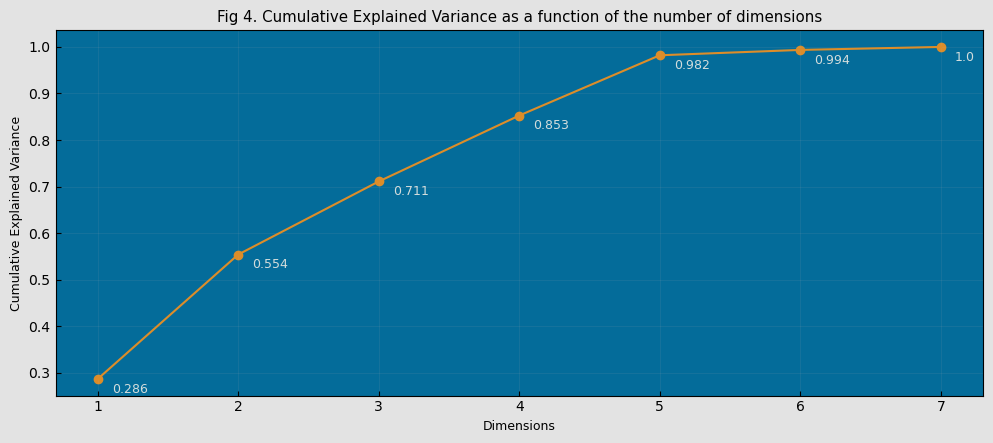

In [155]:
matplotlib.rcParams['font.size'] = 9
x_plot = [i+1 for i in range (len(pca.explained_variance_ratio_))]
cumsum_rounded = np.round(cumsum,3).tolist()
fig, ax = plt.subplots(figsize=(10, 4.5))
ax.scatter( x = x_plot , y = cumsum,alpha=1, color = '#DD8D29')
ax.plot(x_plot, cumsum,alpha=1, color = '#DD8D29')
ax.grid(visible=True, which='major', axis='both', alpha = 0.1)
ax.set_facecolor('#046C9A')
ax.tick_params(labelsize=10 ,direction='in')
fig.set_facecolor('#E3E3E3')
#ax.legend(loc=(0.8, 0.78),labelcolor='linecolor', framealpha=0, fontsize=8) 
ax.set_xlabel('Dimensions')
ax.set_ylabel('Cumulative Explained Variance')
ax.title.set_text('Fig 4. Cumulative Explained Variance as a function of the number of dimensions')
plt.xticks(x_plot)
#plt.figtext(0.88, 0.01, " Figure 3 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
#plt.savefig('Fig 3.png', bbox_inches='tight')
for i in range(len(pca.explained_variance_ratio_)): 
    plt.annotate(cumsum_rounded[i], (x_plot[i]+0.1, cumsum[i]-0.03), color='#D3DDDC',) 
plt.tight_layout()
plt.savefig('Fig 4.png', bbox_inches='tight')

In [156]:
pca_1 = PCA(random_state=5508, n_components = 5)

In [157]:
X_train_3_sd_PCA8 = pca_1.fit_transform(X_train_3_sd_pca)

In [158]:
X_train_3_sd_PCA8

array([[-0.76918863,  0.78162753, -0.07320482,  0.02039458,  0.70442993],
       [-0.96275373,  0.35355319, -0.04314281, -0.47693657, -0.30515523],
       [ 0.59540852, -1.28216817,  0.71384255, -0.38356578,  0.41189923],
       ...,
       [ 1.01427829, -1.71160519,  0.27699387, -0.34070441,  0.26230371],
       [-1.14020317,  0.44203381,  0.21164574, -0.62954976, -0.4616939 ],
       [ 1.42252758, -0.96570935, -0.46961373,  0.4024323 , -0.37576922]])

In [404]:
# test_p = PCA(random_state=5508, n_components=0.9)
# test_p.fit_transform(X_train_3_sd_pca)[0]

In [159]:
lin_reg_pca8_sd = linear_model.LinearRegression()
lin_reg_pca8_sd.fit(X_train_3_sd_PCA8,y_train_3)

LinearRegression()

In [160]:
X_test_3_sd_PCA8 = pca_1.transform(X_test_3_sd_pca)

In [164]:
print("RMSE for linear model -PCA-5- data 3 training : %.2f" % mean_squared_error(y_train_3,lin_reg_pca8_sd.predict(X_train_3_sd_PCA8),squared=False))
print("RMSE for linear model -PCA-5- data 3 test : %.2f" % mean_squared_error(y_test_3,lin_reg_pca8_sd.predict(X_test_3_sd_PCA8),squared=False))

RMSE for linear model -PCA-5- data 3 training : 0.81
RMSE for linear model -PCA-5- data 3 test : 1.34


In [165]:
clf = make_pipeline(PCA(random_state=5508), linear_model.LinearRegression())

param_grid = {
    "pca__n_components": np.arange(1, len(pca.explained_variance_ratio_))
}
kf = KFold(n_splits=10, shuffle=True, random_state=5508)
# param_distrib = {
# "pca__n_components": np.arange(10, 80),
# "randomforestclassifier__n_estimators": np.arange(50, 500)
# }
grid_search_4 = GridSearchCV(clf, param_grid, cv=kf,error_score='raise')
grid_search_4.fit(X_train_3_sd_pca, y_train_3)

GridSearchCV(cv=KFold(n_splits=10, random_state=5508, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA(random_state=5508)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pca__n_components': array([1, 2, 3, 4, 5, 6])})

In [166]:
grid_search_4.best_params_

{'pca__n_components': 6}

### retrain

In [168]:
pca_2 = PCA(random_state=5508, n_components = 6)

In [169]:
X_train_3_sd_PCA6 = pca_2.fit_transform(X_train_3_sd_pca)

In [170]:
X_test_3_sd_PCA6 = pca_2.transform(X_test_3_sd_pca)

In [171]:
lin_reg_pca6_sd = linear_model.LinearRegression()
lin_reg_pca6_sd.fit(X_train_3_sd_PCA6,y_train_3)

LinearRegression()

In [172]:
print("RMSE for linear model -PCA-6- data 3 training : %.2f" % mean_squared_error(y_train_3,lin_reg_pca6_sd.predict(X_train_3_sd_PCA6),squared=False))
print("RMSE for linear model -PCA-6- data 3 test : %.2f" % mean_squared_error(y_test_3,lin_reg_pca6_sd.predict(X_test_3_sd_PCA6),squared=False))

RMSE for linear model -PCA-6- data 3 training : 0.73
RMSE for linear model -PCA-6- data 3 test : 1.17


# D9

In [174]:
data9 = data3.drop(['INLAND','ISLAND','NEAR BAY','NEAR OCEAN'], axis = 1)

In [175]:
data9

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
0,-122.23,37.88,41,8.3252,4.526,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,0.781,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,2.5568,0.771,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,1.7000,0.923,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1.8672,0.847,5.329513,1.171920,2.123209


In [176]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

In [457]:
# model_hc_1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric ='euclidean', linkage = 'average', compute_full_tree = True,  compute_distances= True)
# model_hc_1.fit(data9)

In [177]:
model_hc_1 = AgglomerativeClustering( n_clusters=4, metric ='euclidean', linkage = 'average')
model_hc_1.fit(data9)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [207]:
[sum(model_hc_1.labels_ == 1)]

[1]

In [216]:
def my_function_mean (n_clusters, model_labels, data):
    result = []
    for i in range(n_clusters):
        result.append([sum(model_labels == i)] + data[model_labels == i].describe().loc['mean'].tolist())
    return pd.DataFrame( result, columns = ['Size of Cluster'] + data.columns.tolist(),index = ['cluster: ' + str(i+1)  for i in range(n_clusters)])

In [217]:
average_df_1 = my_function_mean (4, model_hc_1.labels_, data9)

In [218]:
def highlight_second_row(s):
    return ['background-color: #6FB2C1' if i % 2 != 0 else 'background-color: #90D4CC' for i in range(len(s))]
average_df_1 .style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '12px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,Size of Cluster,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
cluster: 1,20636,-119.569411,35.631367,28.636364,3.870154,2.068581,5.428809,1.096655,2.946435
cluster: 2,1,-121.980000,38.320000,45.000000,10.226400,1.375000,3.166667,0.833333,1243.333333
cluster: 3,2,-120.605000,37.865000,41.000000,4.890900,2.087500,7.109890,1.225275,551.087912
cluster: 4,1,-121.150000,38.690000,52.000000,6.135900,2.250000,8.275862,1.517241,230.172414


In [ ]:
sum(model_hc_1.labels_ == 3)

In [219]:
hc_ss = StandardScaler()
data9_sd = hc_ss.fit_transform(data9)

In [220]:
data9_sd = pd.DataFrame(data9_sd, columns = data9.columns.tolist())

In [221]:
model_hc_2 = AgglomerativeClustering(n_clusters=4, metric ='euclidean', linkage = 'average')
model_hc_2.fit(data9_sd)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

### below to examine which groups have changed. 

In [236]:
np.where(model_hc_2.labels_ != model_hc_1.labels_ )[0]

array([ 1914,  1979,  3364, 13034, 16669, 19006], dtype=int64)

In [223]:
model_hc_2.labels_[ model_hc_2.labels_ != model_hc_1.labels_ ]

array([2, 2, 1, 0, 1, 3], dtype=int64)

In [232]:
model_hc_1.labels_[ model_hc_2.labels_ != model_hc_1.labels_ ]

array([0, 0, 2, 3, 2, 1], dtype=int64)

In [225]:
average_df_2 = my_function_mean (4, model_hc_2.labels_, data9_sd)

In [226]:
average_df_2.style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '12px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,Size of Cluster,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
cluster: 1,20635,0.000134,-0.000309,-0.000196,-0.000183,-0.000077,-0.005184,-0.005880,-0.010897
cluster: 2,2,-0.516748,1.045525,0.982143,0.537026,0.016415,0.679391,0.271365,52.766023
cluster: 3,2,-0.259695,1.509030,0.386207,-0.326708,1.078011,53.268465,60.677100,-0.048818
cluster: 4,1,-1.203053,1.258550,1.299975,3.345515,-0.601041,-0.914402,-0.555691,119.419103


# D9 C

In [240]:
good_init = average_df_2.to_numpy()[:,1:]

In [241]:
good_init

array([[ 1.33556536e-04, -3.08585496e-04, -1.95622701e-04,
        -1.82512842e-04, -7.69474368e-05, -5.18445895e-03,
        -5.88036049e-03, -1.08967052e-02],
       [-5.16747807e-01,  1.04552548e+00,  9.82142658e-01,
         5.37026029e-01,  1.64150862e-02,  6.79391051e-01,
         2.71364729e-01,  5.27660233e+01],
       [-2.59695487e-01,  1.50903019e+00,  3.86207069e-01,
        -3.26707519e-01,  1.07801060e+00,  5.32684649e+01,
         6.06771003e+01, -4.88184729e-02],
       [-1.20305254e+00,  1.25855037e+00,  1.29997497e+00,
         3.34551548e+00, -6.01041006e-01, -9.14401602e-01,
        -5.55691418e-01,  1.19419103e+02]])

In [244]:
kmeans_1 = KMeans(n_clusters = 4, init = good_init, n_init = 1, random_state= 5508)
kmeans_1.fit(data9_sd)

KMeans(init=array([[ 1.33556536e-04, -3.08585496e-04, -1.95622701e-04,
        -1.82512842e-04, -7.69474368e-05, -5.18445895e-03,
        -5.88036049e-03, -1.08967052e-02],
       [-5.16747807e-01,  1.04552548e+00,  9.82142658e-01,
         5.37026029e-01,  1.64150862e-02,  6.79391051e-01,
         2.71364729e-01,  5.27660233e+01],
       [-2.59695487e-01,  1.50903019e+00,  3.86207069e-01,
        -3.26707519e-01,  1.07801060e+00,  5.32684649e+01,
         6.06771003e+01, -4.88184729e-02],
       [-1.20305254e+00,  1.25855037e+00,  1.29997497e+00,
         3.34551548e+00, -6.01041006e-01, -9.14401602e-01,
        -5.55691418e-01,  1.19419103e+02]]),
       n_clusters=4, n_init=1, random_state=5508)

In [246]:
kmeans_1.cluster_centers_

array([[ 1.33556536e-04, -3.08585496e-04, -1.95622701e-04,
        -1.82512842e-04, -7.69474368e-05, -5.18445895e-03,
        -5.88036049e-03, -1.08967052e-02],
       [-5.16747807e-01,  1.04552548e+00,  9.82142658e-01,
         5.37026029e-01,  1.64150862e-02,  6.79391051e-01,
         2.71364729e-01,  5.27660233e+01],
       [-2.59695487e-01,  1.50903019e+00,  3.86207069e-01,
        -3.26707519e-01,  1.07801060e+00,  5.32684649e+01,
         6.06771003e+01, -4.88184729e-02],
       [-1.20305254e+00,  1.25855037e+00,  1.29997497e+00,
         3.34551548e+00, -6.01041006e-01, -9.14401602e-01,
        -5.55691418e-01,  1.19419103e+02]])

In [247]:
kmeans_1.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [344]:
average_df_3 = my_function_mean (4, kmeans_1.labels_, data9_sd)

In [345]:
average_df_3.style.apply(highlight_second_row).set_properties(**{'border': '2px solid green',
                          'color': 'black',
                            'font-size': '12px',
                                       }).set_table_styles([{'selector':'',
                            'props':[('word-wrap', 'break-word'),
                                     ('max-width','45px'),
                                     ( 'text-align', 'middle')
                                    ]
                           }])

,Size of Cluster,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
cluster: 1,20635,0.000134,-0.000309,-0.000196,-0.000183,-0.000077,-0.005184,-0.005880,-0.010897
cluster: 2,2,-0.516748,1.045525,0.982143,0.537026,0.016415,0.679391,0.271365,52.766023
cluster: 3,2,-0.259695,1.509030,0.386207,-0.326708,1.078011,53.268465,60.677100,-0.048818
cluster: 4,1,-1.203053,1.258550,1.299975,3.345515,-0.601041,-0.914402,-0.555691,119.419103


# D9 (d)

In [248]:
pca_clusterring = PCA(random_state=5508, n_components=2)
pca_clusterring.fit(data9_sd)


PCA(n_components=2, random_state=5508)

In [249]:
pca_clusterring.components_

array([[-0.26204075,  0.27267127, -0.11548498,  0.34308919,  0.26286351,
         0.62772588,  0.51258796, -0.00739162],
       [ 0.60116203, -0.63374453, -0.11056103,  0.32342058,  0.30694062,
         0.14707329,  0.06548743, -0.00397252]])

In [250]:
pca_clusterring_data = pca_clusterring.transform(data9_sd)

In [251]:
pca_clusterring_data_df = pd.DataFrame(pca_clusterring_data, columns = ['PC1','PC2'])

In [276]:
model_hc_3 = AgglomerativeClustering( n_clusters=4, metric ='euclidean', linkage = 'average')
model_hc_3.fit(pca_clusterring_data)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

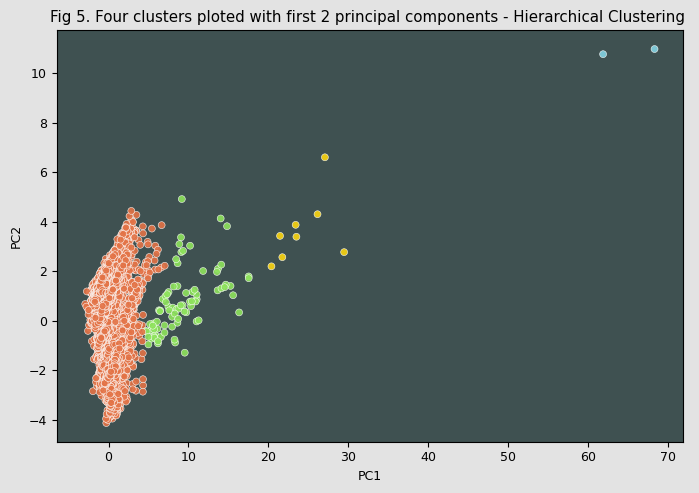

In [342]:
colors = [ '#8EE35D',"#85D4E3", '#FAD510', '#E37346']
# palette=sns.color_palette("husl", 20)
fig, axs = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', data=pca_clusterring_data_df, s = 25, alpha = 0.9, hue=model_hc_3.labels_,  palette=colors)
# ax.set_title(f'{df.columns[i]} vs Median House Price')
# ax.set_xlabel (f'{df.columns[i]}')
#axs.legend(loc=(0.01, 0.78),labelcolor='linecolor', framealpha=0, fontsize=10) 
axs.legend().set_visible(False)
axs.set_facecolor('#3F5151')
axs.title.set_text('Fig 5. Four clusters ploted with first 2 principal components - Hierarchical Clustering ')
fig.set_facecolor('#E3E3E3')
plt.tight_layout()
plt.savefig('Fig 5.png', bbox_inches='tight')

In [256]:
kmeans_2 = KMeans(n_clusters = 4, n_init = 'auto' , random_state= 5508)
kmeans_2.fit(pca_clusterring_data)

KMeans(n_clusters=4, n_init='auto', random_state=5508)

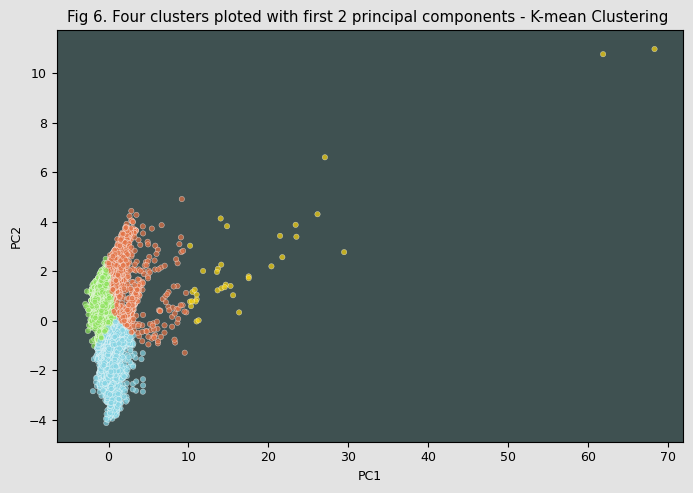

In [341]:
colors = [ '#8EE35D',"#85D4E3", '#FAD510', '#E37346']
fig, axs = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', data=pca_clusterring_data_df, s = 15, alpha = 0.7, hue=kmeans_2.labels_,  palette=colors)
# ax.set_title(f'{df.columns[i]} vs Median House Price')
# ax.set_xlabel (f'{df.columns[i]}')
#axs.legend(loc=(0.01, 0.78),labelcolor='linecolor', framealpha=0, fontsize=10) 
axs.legend().set_visible(False)
axs.set_facecolor('#3F5151')
axs.title.set_text('Fig 6. Four clusters ploted with first 2 principal components - K-mean Clustering ')
fig.set_facecolor('#E3E3E3')
plt.tight_layout()
plt.savefig('Fig 6.png', bbox_inches='tight')

# D10

In [278]:
data9_sd

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOcupation
0,-1.327835,1.052548,0.982143,2.344766,2.129631,0.628559,-0.153758,-0.049597
1,-1.322844,1.043185,-0.607019,2.332238,1.314156,0.327041,-0.263336,-0.092512
2,-1.332827,1.038503,1.856182,1.782699,1.258693,1.155620,-0.049016,-0.025843
3,-1.337818,1.038503,1.856182,0.932968,1.165100,0.156966,-0.049833,-0.050329
4,-1.337818,1.038503,1.856182,-0.012881,1.172900,0.344711,-0.032906,-0.085616
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-1.216128,-1.115804,-0.155023,0.077354,-0.049110
20636,-0.818722,1.806329,-0.845393,-0.691593,-1.124470,0.276881,0.462365,0.005021
20637,-0.823713,1.778237,-0.924851,-1.142593,-0.992746,-0.090318,0.049414,-0.071735
20638,-0.873626,1.778237,-0.845393,-1.054583,-1.058608,-0.040211,0.158778,-0.091225


In [279]:
np.arange(2,20).tolist()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [280]:
range_n_clusters = np.arange(2,20).tolist()
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=5508, n_init = 'auto')
    cluster_labels = clusterer.fit_predict(data9_sd)
    silhouette_avg = silhouette_score(data9_sd, cluster_labels)
    silhouette_scores.append(silhouette_avg)

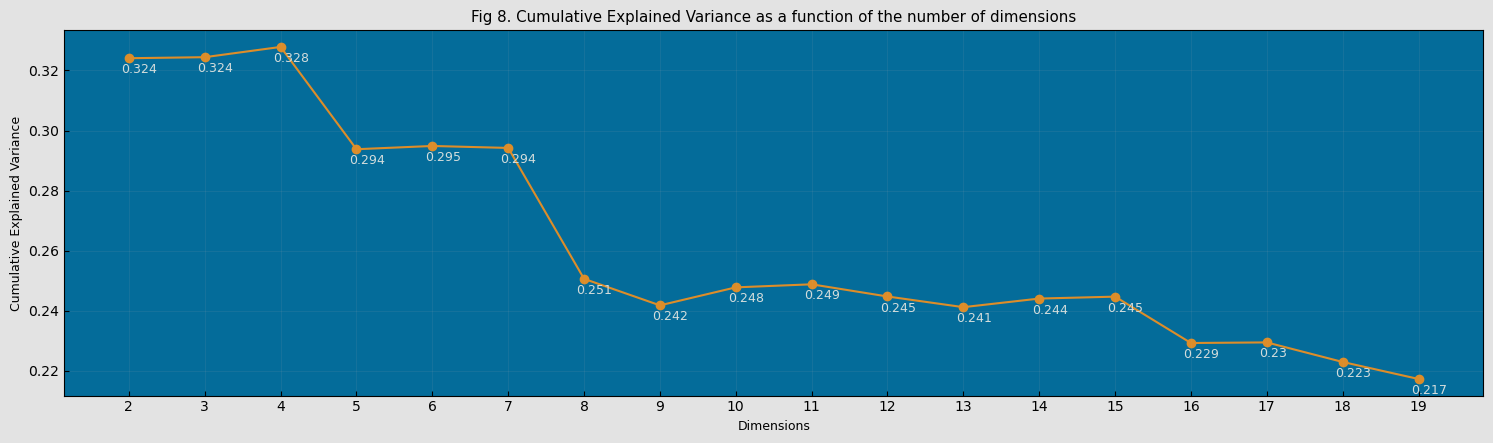

In [281]:
matplotlib.rcParams['font.size'] = 9
silhouette_scores_rounded = np.around((silhouette_scores),3)
fig, ax = plt.subplots(figsize=(15, 4.5))
ax.scatter( x = range_n_clusters , y = silhouette_scores ,alpha=1, color = '#DD8D29')
ax.plot(range_n_clusters, silhouette_scores,alpha=1, color = '#DD8D29')
ax.grid(visible=True, which='major', axis='both', alpha = 0.1)
ax.set_facecolor('#046C9A')
ax.tick_params(labelsize=10 ,direction='in')
fig.set_facecolor('#E3E3E3')
#ax.legend(loc=(0.8, 0.78),labelcolor='linecolor', framealpha=0, fontsize=8) 
ax.set_xlabel('Dimensions')
ax.set_ylabel('Cumulative Explained Variance')
ax.title.set_text('Fig 8. Cumulative Explained Variance as a function of the number of dimensions')
plt.xticks(range_n_clusters)
#plt.figtext(0.88, 0.01, " Figure 3 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
#plt.savefig('Fig 3.png', bbox_inches='tight')
for i in range(len(range_n_clusters)): 
    plt.annotate(silhouette_scores_rounded[i], (range_n_clusters[i]-0.1, silhouette_scores[i]-0.005), color='#D3DDDC',) 
plt.tight_layout()
plt.savefig('Fig 8.png', bbox_inches='tight')

In [682]:
np.around((silhouette_scores),3)

array([0.324, 0.324, 0.328, 0.294, 0.295, 0.294, 0.251, 0.242, 0.248,
       0.249, 0.245, 0.241, 0.244, 0.245, 0.229, 0.23 , 0.223, 0.217])

In [282]:
kmeans_3 = KMeans(n_clusters = 3, n_init = 'auto' , random_state= 5508)
kmeans_3.fit(pca_clusterring_data)

KMeans(n_clusters=3, n_init='auto', random_state=5508)

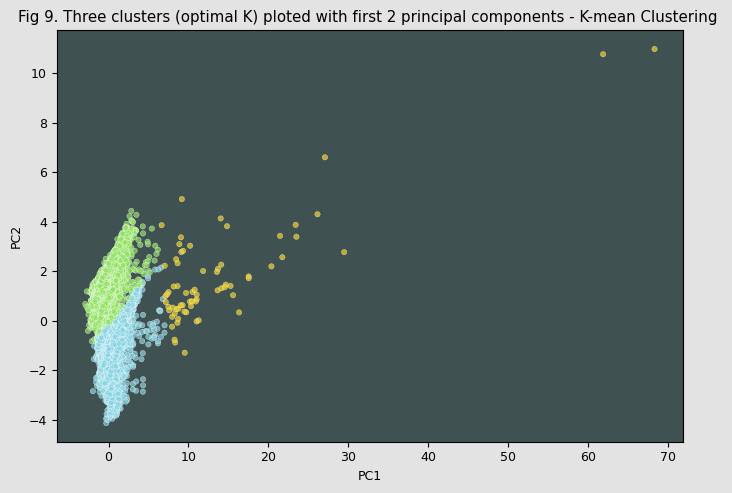

In [339]:
colors = [ '#8EE35D',"#85D4E3", '#FAD510']
fig, axs = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(x='PC1', y='PC2', data=pca_clusterring_data_df, s = 15, alpha = 0.7, hue=kmeans_3.labels_,  palette=colors)
# ax.set_title(f'{df.columns[i]} vs Median House Price')
# ax.set_xlabel (f'{df.columns[i]}')
#axs.legend(loc=(0.01, 0.78),labelcolor='linecolor', framealpha=0, fontsize=10) 
axs.legend().set_visible(False)
axs.set_facecolor('#3F5151')
axs.title.set_text('Fig 9. Three clusters (optimal K) ploted with first 2 principal components - K-mean Clustering ')
fig.set_facecolor('#E3E3E3')
plt.tight_layout()
plt.savefig('Fig 9.png', bbox_inches='tight')

In [301]:
df_cat['oceanProximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: oceanProximity, Length: 20640, dtype: object

In [305]:
pca_clusterring_data[:,0]

array([2.20190541, 1.91778975, 2.06103177, ..., 0.12372313, 0.22816487,
       0.30349044])

In [290]:
pca_clusterring_data[:,0]

array([2.20190541, 1.91778975, 2.06103177, ..., 0.12372313, 0.22816487,
       0.30349044])

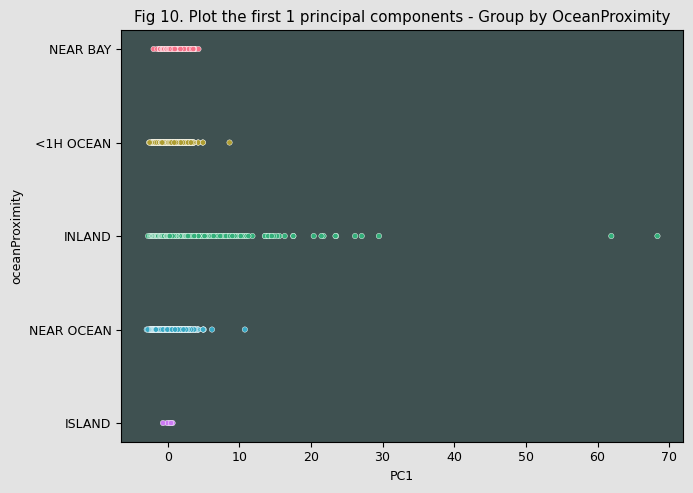

In [343]:
colors = [ '#8EE35D',"#85D4E3", '#FAD510', '#DDDDDD']
fig, axs = plt.subplots(1,1, figsize=(7,5))
sns.scatterplot(x='PC1', y=df_cat['oceanProximity'], data=pca_clusterring_data_df, s = 15, alpha = 1, hue=df_cat['oceanProximity'], palette=sns.color_palette("husl", 5))
# ax.set_title(f'{df.columns[i]} vs Median House Price')
# ax.set_xlabel (f'{df.columns[i]}')
#axs.legend(loc=(0.01, 0.78),labelcolor='linecolor', framealpha=0, fontsize=10) 
axs.legend().set_visible(False)
axs.set_facecolor('#3F5151')
axs.title.set_text('Fig 10. Plot the first 1 principal components - Group by OceanProximity')
fig.set_facecolor('#E3E3E3')
plt.tight_layout()
plt.savefig('Fig 10.png', bbox_inches='tight')

In [335]:
df_cat['oceanProximity'].value_counts()

oceanProximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64